## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.layers import BatchNormalization,Dense,Activation

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
        else:
            x = Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
    
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
"""Code Here
設定超參數
"""
BATCH_SIZE=32
EPOCHS=50
LEARNING_RATE=1e-2
MOMENTUM=0.95
WAIT_TIME=[10,25]

In [13]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

results = {}

for wt in WAIT_TIME:
    keras.backend.clear_session()
    model=build_mlp(x_train.shape[1:])
    opt=keras.optimizers.SGD(lr=LEARNING_RATE,momentum=MOMENTUM,nesterov=True)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
    
    earlystop=EarlyStopping(monitor='val_acc',patience=wt,verbose=1)
    model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,
             validation_data=(x_test,y_test),shuffle=True,
             callbacks=[earlystop])
    
    
    exp_name='exp-early-stop-%s' % str(wt)
    results[exp_name]=model.history.history
    

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 25s 498us/step - loss: 1.6714 - acc: 0.4020 - val_loss: 1.4727 - val_acc: 0.4682
Epoch 2/50
50000/50000 [==============================] - 23s 461us/step - loss: 1.4524 - acc: 0.4815 - val_loss: 1.3908 - val_acc: 0.5011
Epoch 3/50
50000/50000 [==============================] - 24s 473us/step - loss: 1.3516 - acc: 0.5206 - val_loss: 1.3387 - val_acc: 0.5211
Epoch 4/50
50000/50000 [==============================] - 23s 455us/step - loss: 1.2782 - acc: 0.5452 - val_loss: 1.3149 - val_acc: 0.5331
Epoch 5/50
50000/50000 [==============================] - 25s 495us/step - loss: 1.2149 - acc: 0.5667 - val_loss: 1.3087 - val_acc: 0.5402
Epoch 6/50
50000/50000 [==============================] - 26s 517us/step - loss: 1.1611 - acc: 0.5852 - val_loss: 1.2691 - val_acc: 0.5550
Epoch 7/50
50000/50000 [==============================] - 26s 521us/step - loss: 1.1092 - acc: 0.6028 - val_loss: 1.

Epoch 35/50
50000/50000 [==============================] - 24s 473us/step - loss: 0.4114 - acc: 0.8539 - val_loss: 1.8234 - val_acc: 0.5502
Epoch 36/50
50000/50000 [==============================] - 24s 475us/step - loss: 0.3984 - acc: 0.8582 - val_loss: 1.8082 - val_acc: 0.5568
Epoch 37/50
50000/50000 [==============================] - 24s 481us/step - loss: 0.3942 - acc: 0.8603 - val_loss: 1.8334 - val_acc: 0.5523
Epoch 38/50
50000/50000 [==============================] - 23s 459us/step - loss: 0.3793 - acc: 0.8641 - val_loss: 1.8044 - val_acc: 0.5519
Epoch 39/50
50000/50000 [==============================] - 23s 463us/step - loss: 0.3613 - acc: 0.8706 - val_loss: 1.8767 - val_acc: 0.5490
Epoch 40/50
50000/50000 [==============================] - 23s 457us/step - loss: 0.3472 - acc: 0.8767 - val_loss: 1.9432 - val_acc: 0.5444
Epoch 41/50
50000/50000 [==============================] - 23s 458us/step - loss: 0.3493 - acc: 0.8751 - val_loss: 1.8956 - val_acc: 0.5469
Epoch 00041: early s

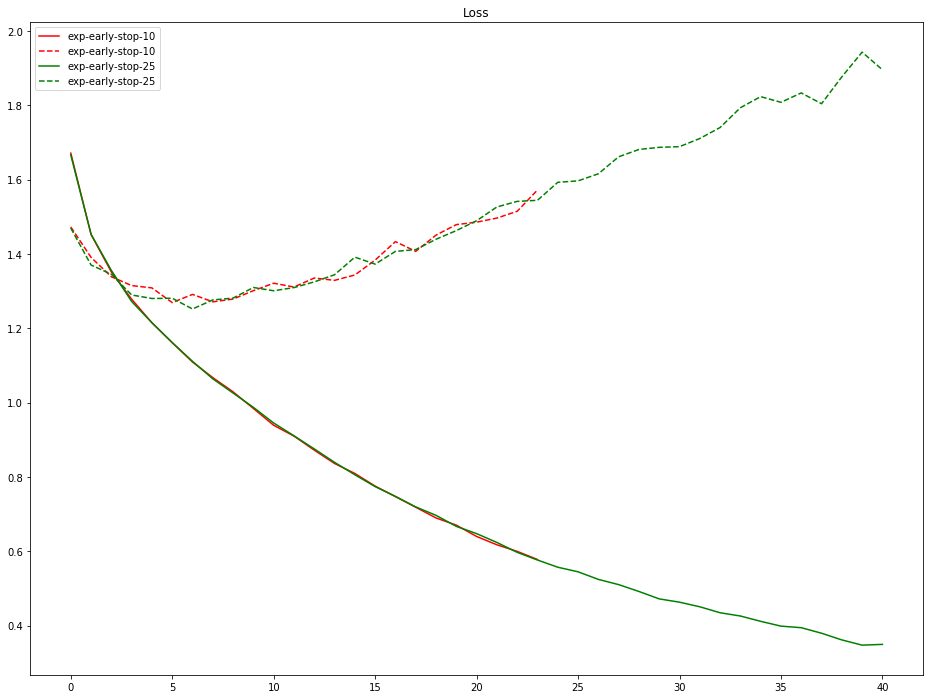

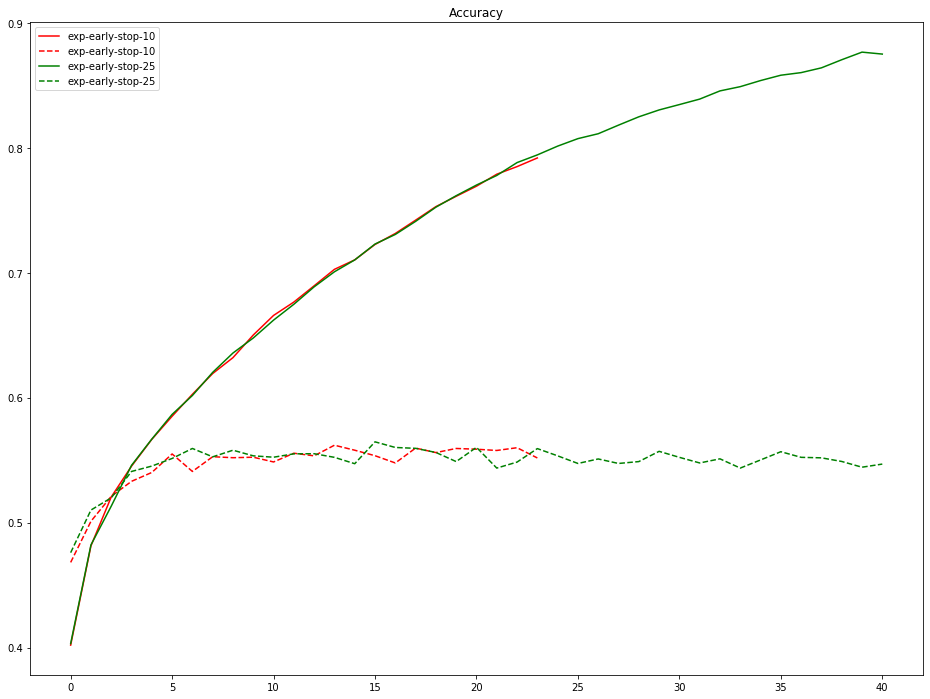

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k", "c", "darkorange"]

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['loss'])),results[con]['loss'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_loss'])),results[con]['val_loss'], '--', label=con, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['acc'])),results[con]['acc'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_acc'])),results[con]['val_acc'], '--', label=con, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()